In [74]:
import matplotlib.pyplot as plt
import yaml
import os
import numpy as np

depth explorations:

clear improvment from 8 to 16 to 32
from 32 to higher the improvment is not worth the aditional number of parameters.

In [118]:
gathered_metric_path = "../results/final_lr_test/gathered_metrics.yaml"
with open(gathered_metric_path, 'r') as file:
    gathered_metrics = yaml.safe_load(file)
n_models = len(gathered_metrics)
metrics = np.empty((n_models, 8), dtype=object)





for i_m, models in enumerate(gathered_metrics):
    model_metric = gathered_metrics[models]
    #print(models)
    if "Regularized" in models:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], model_metric["dropout"], model_metric["batchnorm"]
        if model_metric["learning_rate"] == 5e-5 and model_metric["hidden_dim"] == [32, 32]:
            loss_low_lr = model_metric["train_loss"], model_metric["val_loss"]
            
        if model_metric["learning_rate"] == 1e-3 and model_metric["hidden_dim"] == [32, 32]:
            loss_high_lr = model_metric["train_loss"], model_metric["val_loss"]
        
    else:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], "", ""
        
    



In [76]:
try:
    plt.style.use("~/Documents/uni/phd/mypackage/mypackage/pyplot/presentation.mlpstyle")
except:
    pass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


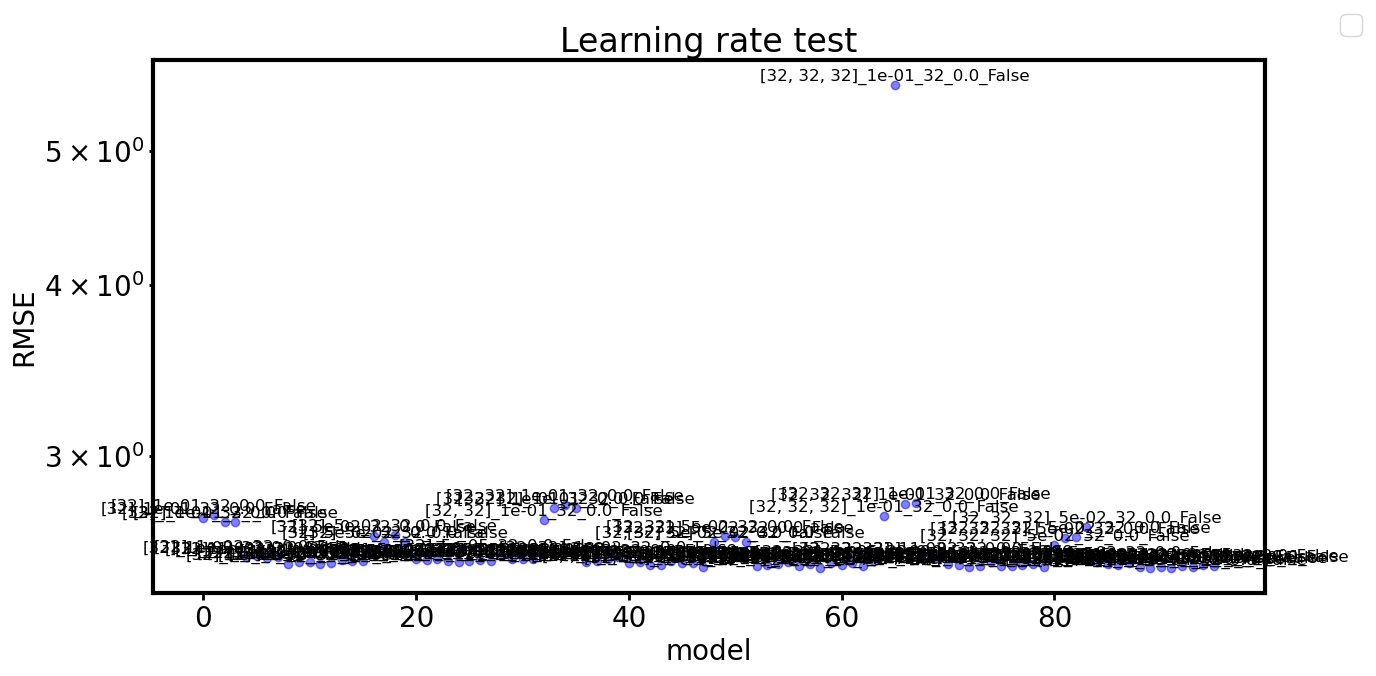

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(np.arange(n_models,dtype=int), metrics[:, 2], c="blue", alpha=0.5)
ax.set_xlabel("model")
ax.set_ylabel("RMSE")
ax.set_title("Learning rate test")

for j in range(n_models):
    # if metrics[j, 2] > 4:
    #     continue
    ax.text(j, metrics[j, 2], f"{metrics[j, 3]}_{metrics[j, 4]:.0e}_{metrics[j, 5]}_{metrics[j, 6]}_{metrics[j, 7]}", ha="center", va="bottom", fontsize=12)
fig.legend()

#ax.set(ylim=(2.5, 3))
ax.set(yscale="log")
plt.tight_layout()
plt.show()
    

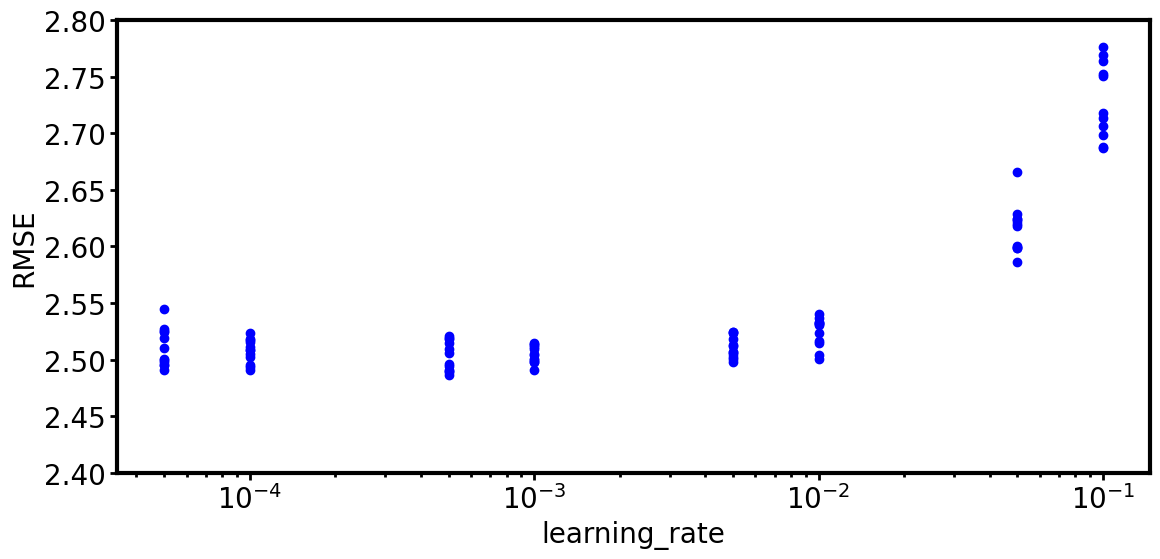

In [106]:
n_lr = np.empty(n_models, dtype=float)
for i_d, d in enumerate(metrics[:, 4]):
    n_lr[i_d] = d
    
LR = np.unique(n_lr)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(n_lr, metrics[:, 2], c="blue")
ax.set(xlabel="learning_rate", ylabel="RMSE")
ax.set(xscale="log")
ax.set(ylim=(2.4, 2.8))
plt.tight_layout()
plt.savefig("../rapport/images/final_lr_test_scatter.png", bbox_inches="tight", dpi=120)
plt.show()

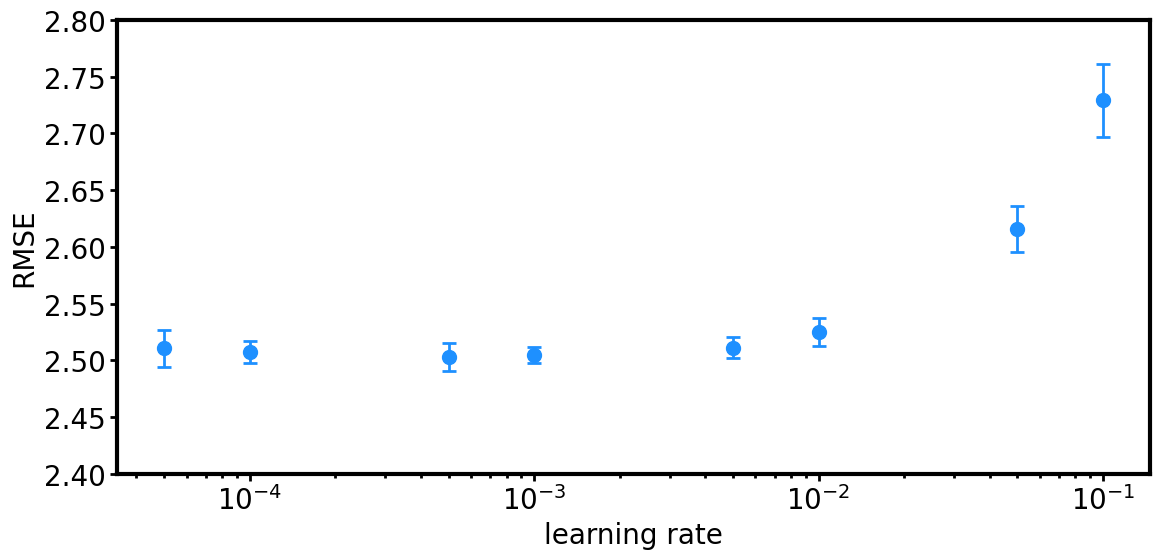

In [157]:
mean_rmse_per_dim = np.empty(LR.size, dtype=float)
std_rmse_per_dim = np.empty(LR.size, dtype=float)
for i, d in enumerate(LR):
    mean_rmse_per_dim[i] = metrics[:, 2][(metrics[:, 2] < 4)& (n_lr == d)].mean()
    std_rmse_per_dim[i] = metrics[:, 2][(metrics[:, 2] < 4)& (n_lr == d)].std()


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.errorbar(LR, mean_rmse_per_dim, yerr=std_rmse_per_dim, fmt='o', c="blue", markersize=10, capsize=5, capthick=2, elinewidth=2)
ax.set(xlabel="learning rate", ylabel="RMSE")
ax.set(xscale="log")
ax.set(ylim=(2.4, 2.8))
plt.tight_layout()
plt.savefig("../rapport/images/final_lr_test.png", bbox_inches="tight", dpi=120)
plt.show()

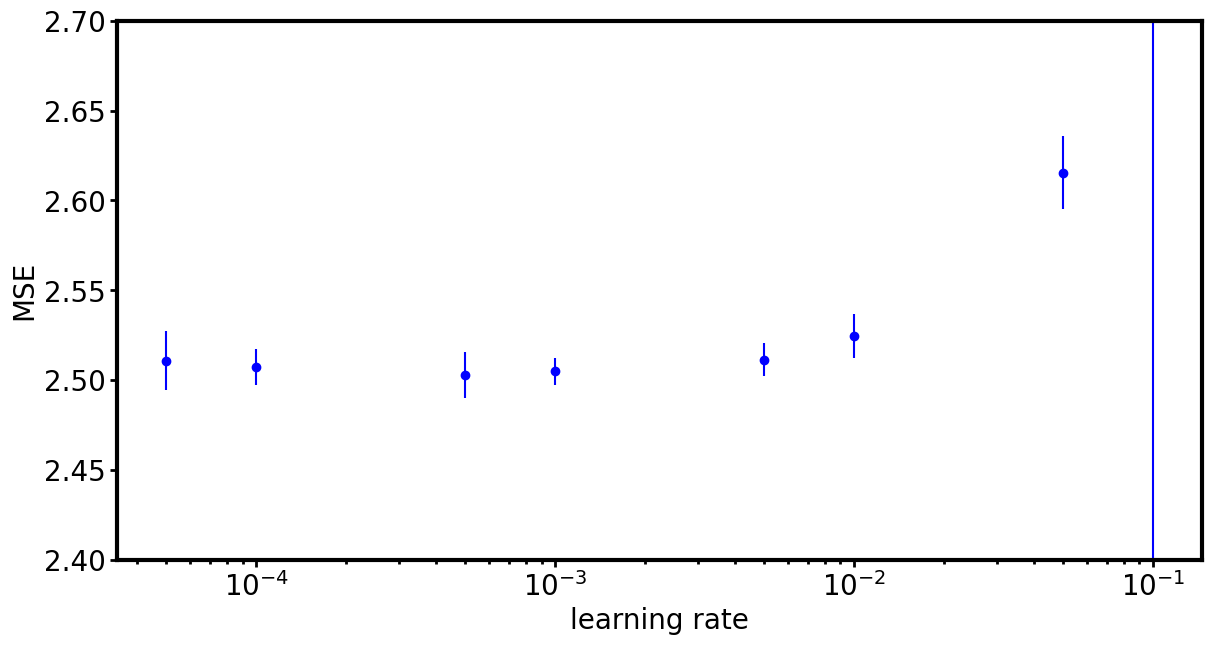

In [80]:
mean_rmse_per_dim = np.empty(LR.size, dtype=float)
std_rmse_per_dim = np.empty(LR.size, dtype=float)
for i, d in enumerate(LR):
    mean_rmse_per_dim[i] = metrics[:, 2][n_lr == d].mean()
    std_rmse_per_dim[i] = metrics[:, 2][n_lr == d].std()


fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.errorbar(LR, mean_rmse_per_dim, yerr=std_rmse_per_dim, fmt='o', c="blue")
ax.set(xlabel="learning rate", ylabel="RMSE")
ax.set(xscale="log")
ax.set(ylim=(2.4, 2.7))
plt.show()

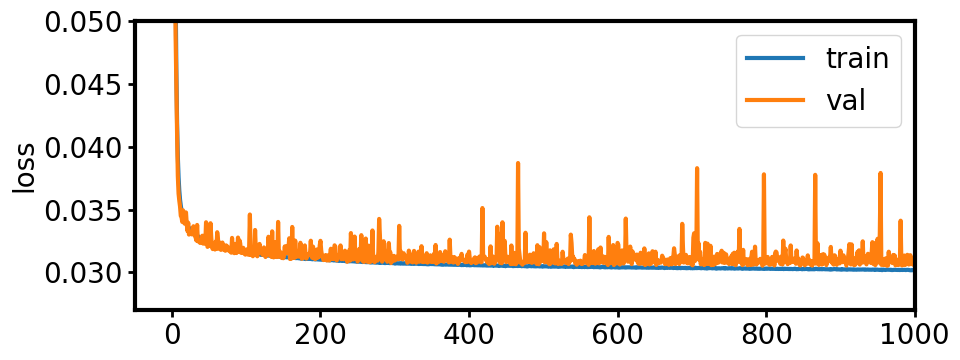

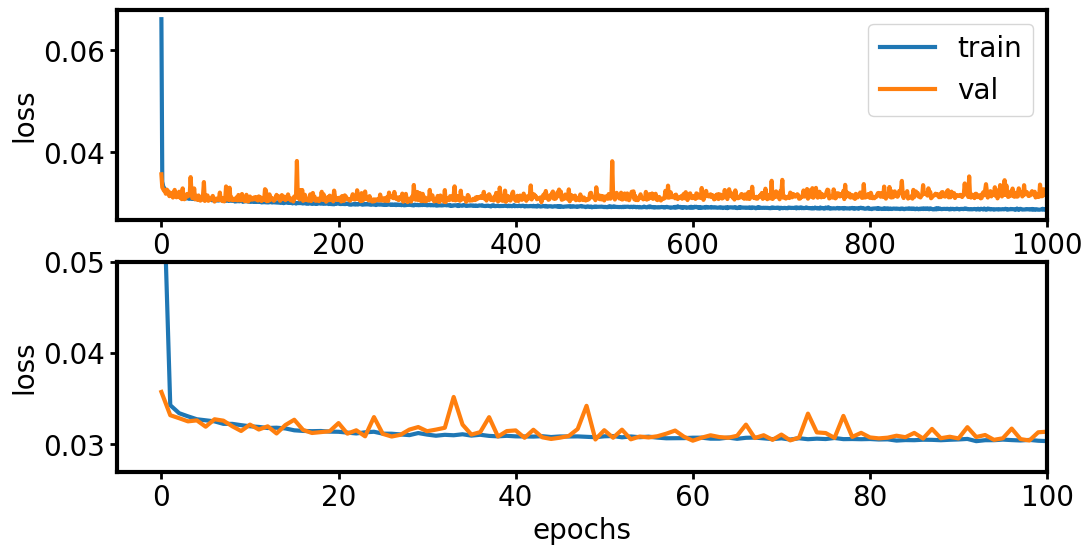

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

epochs = np.arange(len(loss_low_lr[0]))
ax.plot(epochs, loss_low_lr[0], label="train", lw=3)
ax.plot(epochs, loss_low_lr[1], label="val", lw=3)
ax.legend()
ax.set(ylabel="loss", ylim=(0.027, 0.05), xlim=(-50, 1000))

# ax[1].plot(epochs, loss_low_lr[0], label="train", lw=3)
# ax[1].plot(epochs, loss_low_lr[1], label="val", lw=3)
# ax[1].set(xlabel="epochs", ylabel="loss", xlim=(-5, 100))
plt.tight_layout()
plt.savefig("../rapport/images/final_lr_test_loss.png", bbox_inches="tight", dpi=120)
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

epochs = np.arange(len(loss_high_lr[0]))
ax[0].plot(epochs, loss_high_lr[0], label="train", lw=3)
ax[0].plot(epochs, loss_high_lr[1], label="val", lw=3)
ax[0].legend()
ax[0].set(ylabel="loss", xlim=(-50, 1000)) 


ax[1].plot(epochs, loss_high_lr[0], label="train", lw=3)
ax[1].plot(epochs, loss_high_lr[1], label="val", lw=3)
ax[1].set(xlabel="epochs", ylabel="loss", xlim=(-5, 100))
ax[1].set(ylim=(0.027, 0.05), xlim=(-5, 100))
plt.show()